# Training

This notebook visualizes some aspects of the training process.

## Learning rate scheduler

The learning rate scheduler adapts the learning rate according to the amount of epochs.

Failed to plot PLATEAU: should not be called as step is overridden


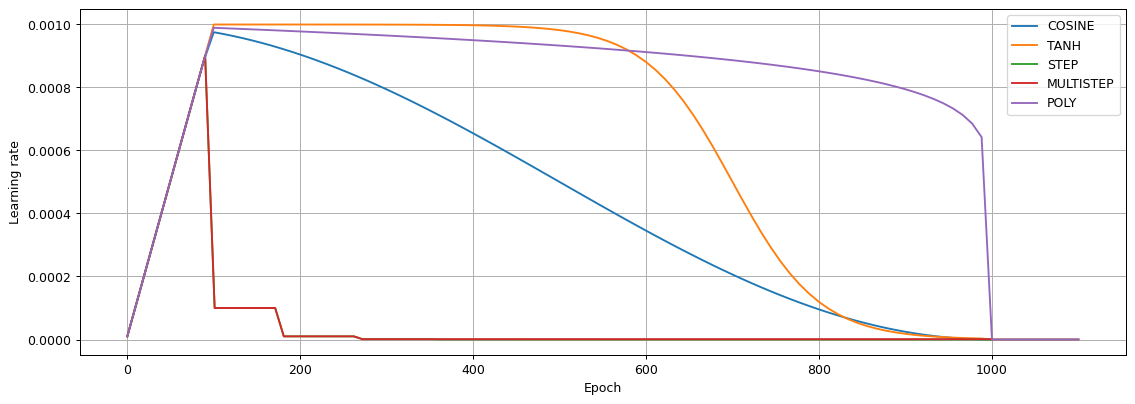

In [17]:
import timm
import seaborn
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import unipercept as up
import warnings
import numpy as np

model = nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

plt.figure(figsize=(15, 5), dpi=90)
plt.grid()

for schedule in up.trainer.SchedType:
    scheduler_lazy = up.trainer.SchedulerFactory(schedule, warmup_epochs=100, num_epochs=1000, cooldown_epochs=100)
    try:
        scheduler, num_epochs = scheduler_lazy(optimizer, 100)

        epochs = [int(n) for n in np.linspace(0, num_epochs, 100)]
        lrs = [scheduler._get_lr(t) for t in epochs]
        plt.plot(epochs, lrs, label=schedule.name)
    except Exception as e:
        print(f"Failed to plot {schedule.name}: {e}")
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()